#### David Signoretti
##### 2019-07-16
##### DeepLearning 3525

### Project Description

I am using LSTM to predict the writings of Plato. But first, create a word2vec to generate a two-dimension vector image of the words. 

Generate the words' base on a prediction from a sample sentence.

#### Import required Modules

In [1]:
import pandas as pd
from gensim.summarization.textcleaner import split_sentences
from gensim.models.word2vec import Word2Vec
from keras.callbacks import LambdaCallback, History, TensorBoard
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import random
import io
import sys
import re
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import time

C:\Users\david\Miniconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


#### Import text file of the the book Plato Republic

In [2]:
with io.open('Rep.txt', encoding='utf-8') as _f:
    _input_text = _f.read().lower()

_input_text = re.sub("\n", " ", _input_text)
_input_text = re.sub("\+", "", _input_text)
_input_text = re.sub("-", "", _input_text)
_input_text = re.sub("=", "", _input_text)
_input_text = re.sub("\[", "", _input_text)
_input_text = re.sub("\]", "", _input_text)
_input_text = re.sub("\(", "", _input_text)
_input_text = re.sub("\)", "", _input_text)

_length_of_input_text = len(_input_text)

print('_length_of_input_text = ',_length_of_input_text)

_length_of_input_text =  677882


In [3]:
#create a sorted list of all the chaarcters from _input_text 
_sorted_characters = sorted(list(set(_input_text)))
_sorted_characters_length = len(_sorted_characters)
#create a list of words fron the _input_text
_list_of_tokenized_sentences = [_x.split() for _x in list(split_sentences(_input_text))]

print('_sorted_characters = ', _sorted_characters)
print('_sorted_characters_length = ', _sorted_characters_length)
print('_list_of_tokenized_sentences =', len(_list_of_tokenized_sentences))

_sorted_characters =  [' ', '!', '"', "'", ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
_sorted_characters_length =  45
_list_of_tokenized_sentences = 5540


In [4]:
#create a list unique words from the _input_text
_vocabulary_of_corpus = []
for _s in _list_of_tokenized_sentences:
    for _t in _s:
        if _t not in _vocabulary_of_corpus:
            _vocabulary_of_corpus.append(_t)

_vocabulary_size = len(_vocabulary_of_corpus)
print('Size of vocabulary = ', _vocabulary_size)

Size of vocabulary =  12813


In [5]:
#create a dictionary charaters to a number to deconstruct words to numbers 
_words_to_index = {_w: _idx for (_idx, _w) in enumerate(_sorted_characters)}
#create a dictionary on numbers to character to create new words from perdictions
_index_to_words = {_idx: _w for (_idx, _w) in enumerate(_sorted_characters)}

print('_words_to_index = ', _words_to_index)

_words_to_index =  {' ': 0, '!': 1, '"': 2, "'": 3, ',': 4, '.': 5, '0': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '9': 15, ':': 16, ';': 17, '?': 18, 'a': 19, 'b': 20, 'c': 21, 'd': 22, 'e': 23, 'f': 24, 'g': 25, 'h': 26, 'i': 27, 'j': 28, 'k': 29, 'l': 30, 'm': 31, 'n': 32, 'o': 33, 'p': 34, 'q': 35, 'r': 36, 's': 37, 't': 38, 'u': 39, 'v': 40, 'w': 41, 'x': 42, 'y': 43, 'z': 44}


#### Word2Vec Gensim

In [6]:
#create a word2vec 300 deminsion vector to display word relationships
_word_to_vec = Word2Vec(_list_of_tokenized_sentences, sg=1, seed=1, workers=3, size=300, min_count=3, window=7, sample=0.001)

_w = _word_to_vec[_word_to_vec.wv.vocab]

C:\Users\david\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [7]:
#convert a 300 dimensional array on to a 2 dimensions for human readable
#t-distributed Stochastic Neighbor Embedding
_tsne = TSNE(n_components=2, random_state=0)
_tsne_fit = _tsne.fit_transform(_w)

#### Plot the word2vec in 2 dimensions

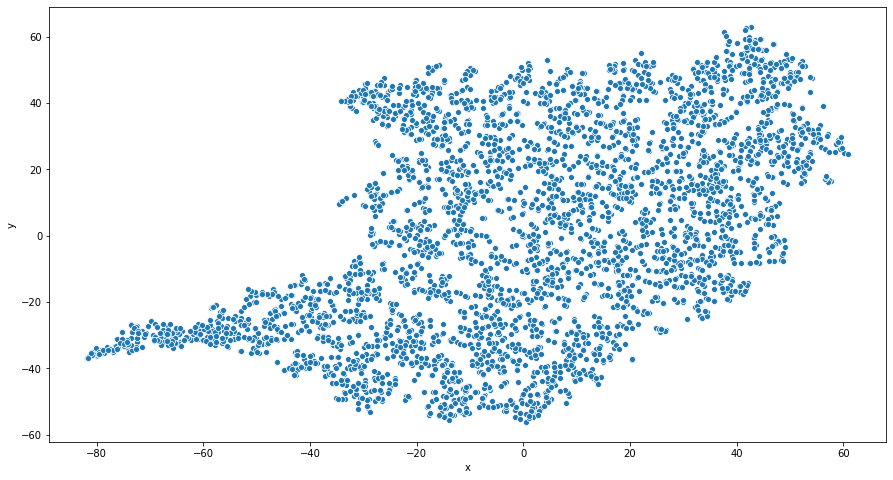

In [8]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
#create a dataframe of the 2 dimensional array 
_df = pd.DataFrame(_tsne_fit, columns=['x', 'y'])
_df['token'] = _word_to_vec.wv.vocab.keys()
#plot
plt.figure(figsize=(15,8))
sns.scatterplot(_df.x, _df.y, palette=cmap)

#### Look at word relationship

In [9]:
_word_to_vec.similar_by_word('plato')

C:\Users\david\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('resides', 0.9972083568572998),
 ('view,', 0.9971697926521301),
 ('middle', 0.9968994855880737),
 ('passion', 0.9968911409378052),
 ('grace', 0.9966112375259399),
 ('mightiest', 0.9965299367904663),
 ('itself,', 0.9964836835861206),
 ('figure', 0.9963319897651672),
 ('element', 0.996283769607544),
 ('being,', 0.9961702823638916)]

In [10]:
_word_to_vec.similar_by_word('republic')

C:\Users\david\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('sun', 0.996535062789917),
 ('only;', 0.9955393671989441),
 ('subjectmatter', 0.9953737258911133),
 ('filled', 0.9950202107429504),
 ('justice.', 0.9948439002037048),
 ('numerous', 0.9946746230125427),
 ('universal', 0.99462890625),
 ('between', 0.9945448040962219),
 ('science', 0.9944809675216675),
 ('partner', 0.9943795204162598)]

## Start of LSTM

In [11]:
#the maximum length of each sentence. There are 128 nodes in the LSTM layer and 64 is half 128
_max_length = 64
#number of steps is 4 because 128 and 64 are divisable by 4 
_number_of_steps = 4
#create empty arrays
_prepared_sentences = []
_prepared_char = []
#create an array of elements that are 64 charaters long, and each array is indexed by 4 charaters
for _i in range(0, _length_of_input_text - _max_length, _number_of_steps):
    _prepared_sentences.append(_input_text[_i: _i + _max_length])
    _prepared_char.append(_input_text[_i + _max_length])

_prepared_sentences_length = len(_prepared_sentences)

print('_prepared_sentences_length = ', _prepared_sentences_length)
print('Example of prepared sentences')
print(_prepared_sentences[:5])

_prepared_sentences_length =  169455
Example of prepared sentences
['the introduction  the republic of plato is the longest of his wo', 'introduction  the republic of plato is the longest of his works ', 'oduction  the republic of plato is the longest of his works with', 'tion  the republic of plato is the longest of his works with the', '  the republic of plato is the longest of his works with the exc']


In [12]:
#create 2 numpy zero filled arrays to prepair for encoding 
_X_train = np.zeros((_prepared_sentences_length, _max_length, _sorted_characters_length), dtype=np.bool)
_Y_train = np.zeros((_prepared_sentences_length, _sorted_characters_length), dtype=np.bool)
#enumerate each _perpared_sentences in to char and numbers for training 
for _i, _s in enumerate(_prepared_sentences):
    for _a, char in enumerate(_s):
        _X_train[_i, _a, _words_to_index[char]] = 1
    _Y_train[_i, _words_to_index[_prepared_char[_i]]] = 1

In [13]:
#keras sequential model
model = Sequential()
#LSTM layer with 128 nodes and an input shape(60,45)
model.add(LSTM(128, input_shape=(_max_length, _sorted_characters_length)))
#dropout layer to reduce overfitting
model.add(Dropout(0.2))
#the dense layer is comprised of 45 nodes
model.add(Dense(len(_sorted_characters), activation='softmax'))
#print model summary
model.summary()
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               89088     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 45)                5805      
Total params: 94,893
Trainable params: 94,893
Non-trainable params: 0
_________________________________________________________________


In [14]:
#testing callback functions. The function OnEpochEnd is call at the end of each epoch
def OnEpochEnd(epoch, _):
    print('Do Something')

_epoch_test = LambdaCallback(on_epoch_end=OnEpochEnd)
#fit the model
model.fit(_X_train, _Y_train, batch_size=128, epochs=64, callbacks=[_epoch_test])

Instructions for updating:
Use tf.cast instead.
Epoch 1/64
169455/169455 [==============================] - 140s 825us/step - loss: 2.3723
Do Something
Epoch 2/64
169455/169455 [==============================] - 138s 814us/step - loss: 1.9799
Do Something
Epoch 3/64
169455/169455 [==============================] - 138s 813us/step - loss: 1.8428s - loss
Do Something
Epoch 4/64
169455/169455 [==============================] - 138s 817us/step - loss: 1.7516
Do Something
Epoch 5/64
169455/169455 [==============================] - 139s 819us/step - loss: 1.6799
Do Something
Epoch 6/64
169455/169455 [==============================] - 139s 818us/step - loss: 1.6253
Do Something
Epoch 7/64
169455/169455 [==============================] - 139s 817us/step - loss: 1.5800
Do Something
Epoch 8/64
169455/169455 [==============================] - 138s 817us/step - loss: 1.5437
Do Something
Epoch 9/64
169455/169455 [==============================] - 138s 815us/step - loss: 1.5094
Do Something
Epoch 10

In [15]:
def TestLSTM(_model):
    #create a start point by way of random number to select ramdom text from _input_text
    _start_prediction = random.randint(0, _length_of_input_text - _max_length - 1)
    #select the text
    _prediction_text = _input_text[_start_prediction: _start_prediction + _max_length]

    print('\nRandom sentence as seed is -- ',_prediction_text)
    #prediction loop    
    for _x in range(200):
        
        _temp = 0.2
        
        #create a zero filled numpy array 
        _X_pred = np.zeros((1, _max_length, _sorted_characters_length), dtype=np.bool)
        #convert the _perdiction_text into numbers
        for _v, _c in enumerate(_prediction_text):
            _X_pred[0, _v, _words_to_index[_c]] = 1
        
        #the prdiction is retuirned and converted to an numpy array of float 64
        _prediction = np.asarray(_model.predict(_X_pred, verbose=0)[0]).astype('float64')
        #create the probabilty for the next character binomial distribution
        _prediction = np.log(_prediction) / _temp
        _prediction_exponent = np.exp(_prediction)
        _prediction = _prediction_exponent / np.sum(_prediction_exponent)
        #one hot encoded of the highest probility for the next char
        _probability = np.random.multinomial(1, _prediction, 1)
        #return the index with the value of 1
        _next_index = np.argmax(_probability)
        #return the character with according the index from _next_index
        _next_char = _index_to_words[_next_index]
        #build the string into senetence
        _prediction_text = _prediction_text[1:] + _next_char

    return _prediction_text

In [16]:
for _p in range(10):
    print('\nPrediction number ', _p)
    print('\nPredicted Sentence is -- ', TestLSTM(model))


Prediction number  0

Random sentence as seed is --   natures who ought to study philosophy and to be leaders in the 

Predicted Sentence is --  nd the present of the same principle and the same precess the be

Prediction number  1

Random sentence as seed is --  first place, none of them should have any property of his own be

Predicted Sentence is --  the like of the soul, and the differences and the state of the l

Prediction number  2

Random sentence as seed is --  and without any assistance of sense, and perseveres until by pur

Predicted Sentence is --  e with the state with the state which we say that the same carri

Prediction number  3

Random sentence as seed is --  again among the prisoners in the den, and partake of their labou

Predicted Sentence is --  epublic and a man who is the man who has the best of the same st

Prediction number  4

Random sentence as seed is --  yrannical. let us place the most just by the side of the most un

Predicted Sentence is --  th the sta

#### References

##### Web
1. https://adventuresinmachinelearning.com/keras-lstm-tutorial/
2. https://medium.com/@shivambansal36/language-modelling-text-generation-using-lstms-deep-learning-for-nlp-ed36b224b275
3. https://keras.io/
4. https://github.com/keras-team

##### Books
Hands-on Machine Learning with Scikit-Learn and Tensorflow -- author Aurelien Geron